In [1]:
import pandas as pd
raw_data=pd.read_csv("TP_1_prostate_dataset.csv",sep="\t")

In [2]:
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [3]:
X=raw_data.iloc[:,1:-3]
y=raw_data.iloc[:,-2]

In [4]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(X)

X_scaled=scaler.transform(X)

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(X_scaled,y,test_size=0.2)

## Baseline: simple linear reg

In [6]:
from sklearn import linear_model
import numpy as np
baseline_reg=linear_model.LinearRegression().fit(Xtrain,ytrain)
baseline_error=np.mean((baseline_reg.predict(Xtest)-ytest)**2)

In [7]:
baseline_error

0.7139320400941177

## Ridge

In [8]:
alphas=[]
coefs=[]
errors=[]
for alpha in np.logspace(-5,5):
    alphas.append(alpha)
    reg=linear_model.Ridge(alpha).fit(Xtrain,ytrain)
    coefs.append(reg.coef_)
    error=np.mean((reg.predict(Xtest)-ytest)**2)
    errors.append([baseline_error,error])

In [9]:
min(errors)

[0.7139320400941177, 0.5534495924539647]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

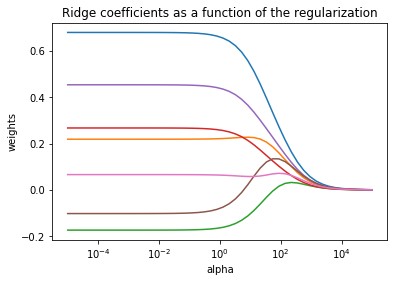

In [11]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

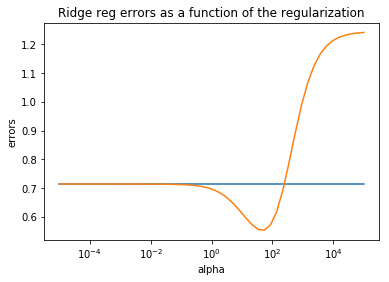

In [12]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title('Ridge reg errors as a function of the regularization')
plt.axis('tight')
plt.show()

## LASSO

In [13]:
alphas=[]
coefs=[]
errors=[]
for alpha in np.logspace(-5,5):
    alphas.append(alpha)
    reg=linear_model.Lasso(alpha).fit(Xtrain,ytrain)
    coefs.append(reg.coef_)
    error=np.mean((reg.predict(Xtest)-ytest)**2)
    errors.append([baseline_error,error])

In [14]:
min(errors)

[0.7139320400941177, 0.46091426684035736]

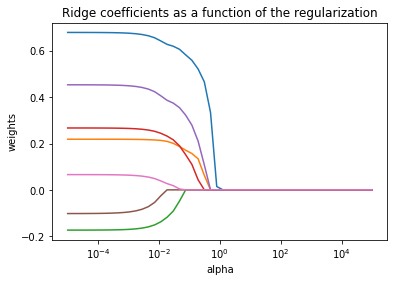

In [15]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

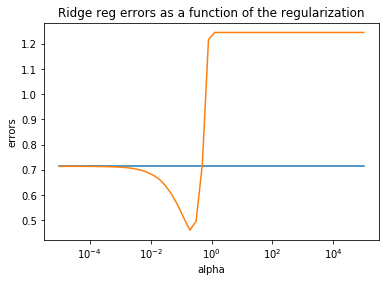

In [16]:
ax=plt.gca()

ax.plot(alphas,errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('errors')
plt.title('Ridge reg errors as a function of the regularization')
plt.axis('tight')
plt.show()

In [17]:
regCV=linear_model.LassoCV(eps=1e-12,n_alphas=1000,max_iter=100000,cv=5).fit(Xtrain,ytrain)

In [18]:
np.mean((regCV.predict(Xtest)-ytest)**2)

0.6528785268562755